In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0 = [-2.,-2.]
mu1 = [3.,3.]
sigma0 = 1.
sigma1 = 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.MultivariateNormal(torch.tensor([mu0]), torch.eye(2))
d1 = torch.distributions.MultivariateNormal(torch.tensor([mu1]), torch.eye(2))

In [5]:
d0.sample((10,))

tensor([[[-0.5953, -1.5682]],

        [[-2.5918, -2.6660]],

        [[-1.4928, -2.5509]],

        [[-1.4284, -1.3373]],

        [[-2.0469, -1.8628]],

        [[-2.6645, -1.5039]],

        [[-1.5842, -0.2379]],

        [[-0.1863, -1.6673]],

        [[-1.9010, -0.0481]],

        [[-1.9803, -2.9431]]])

In [6]:
d1.sample((10,))

tensor([[[2.4375, 4.0594]],

        [[2.1265, 2.3121]],

        [[3.3652, 2.8671]],

        [[5.1551, 2.5294]],

        [[2.0835, 1.4981]],

        [[4.0408, 2.7723]],

        [[3.4630, 3.2244]],

        [[3.8099, 2.8971]],

        [[3.0709, 1.6594]],

        [[2.7120, 2.6409]]])

In [7]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([0.4052, 0.1952]), tensor(0.0994)]


In [8]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.228053


c:\users\abakhvalov\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Using a target size (torch.Size([200000, 1])) that is different to the input size (torch.Size([200000, 1, 1])) is deprecated. Please ensure they have the same size.
  import sys
c:\users\abakhvalov\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([2048, 1])) that is different to the input size (torch.Size([2048, 1, 1])) is deprecated. Please ensure they have the same size.
  if sys.path[0] == '':


Ошибка после 1 итераций: 0.131444
Ошибка после 2 итераций: 0.094728
Ошибка после 3 итераций: 0.075528
Ошибка после 4 итераций: 0.063249
Ошибка после 5 итераций: 0.055006
Ошибка после 6 итераций: 0.049010
Ошибка после 7 итераций: 0.044155
Ошибка после 8 итераций: 0.040575
Ошибка после 9 итераций: 0.037377
Ошибка после 10 итераций: 0.034623
Ошибка после 11 итераций: 0.032515
Ошибка после 12 итераций: 0.030810
Ошибка после 13 итераций: 0.029176
Ошибка после 14 итераций: 0.027836
Ошибка после 15 итераций: 0.026365
Ошибка после 16 итераций: 0.025166
Ошибка после 17 итераций: 0.024176
Ошибка после 18 итераций: 0.023349
Ошибка после 19 итераций: 0.022437


In [65]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, np.mean(mu0), 1) 
d1_pdf = stats.norm.pdf(x_scale, np.mean(mu1), 2)
x_tensor = torch.tensor(x_scale.reshape(-1, 2), dtype=torch.float)
print(x_scale.reshape(-1, 2).shape)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

(2500, 2)


ValueError: x and y must have same first dimension, but have shapes (5000,) and (1250, 2)

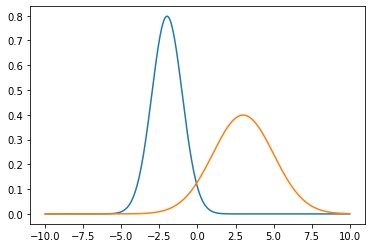

In [61]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [58]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.1022, 0.9591]), tensor(-0.1430)]


In [26]:
torch.log(F.sigmoid(torch.tensor(-100.)))

c:\users\abakhvalov\appdata\local\programs\python\python36\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [27]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)